*This notebook was created by Skylar Miller and Ellis Hartley*


# Backround 

We think that the summer months will perform the best because students are out of school and families will be looking for ways to entertain their children. School is out in the US during June, July, and most of December. With heat waves in full effect, we think the summer months will perform the best.  

**Our question:** Are gross revenue sales from summer months greater than that of other seasons as a whole?

# Assumptions

- We're only interested in domestic gross revenue to keep seasonality consistent. According to [gizmodo](https://gizmodo.com/how-much-money-does-a-movie-need-to-make-to-be-profitab-5747305), "generally, domestic revenue seems to be better for studios than overseas revenue, because the studios take a bigger cut of domestic revenue."

# Hypothesis

**Null Hypothesis:** Summer month revenue is less than or equal to other month revenues. 
 
**Alternative Hypothesis:** Summer month revenue is greater than other month revenues.

# Data Exploration

After previewing (see below) the available data sources, we decided to go with The Numbers Dataset because it contains the release dates and gross revenue of each movie. More info on this dataset can be found here: https://www.the-numbers.com/

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import stats
import datetime as datetime

In [2]:
# Box office movies dataset

df_bom = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')
df_bom.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [3]:
# TheMovieDB dataset

df_tmbd = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')
df_tmbd.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [4]:
# The Numbers dataset

df_tn = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')
df_tn.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [5]:
# Rotten Tomatoes movie info dataset

df_rt_info = pd.read_csv('../../zippedData/rt.movie_info.tsv.gz', sep='\t')
df_rt_info.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


In [6]:
# Rotten Tomatoes movie reviews dataset

df_rt_reviews = pd.read_csv('../../zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ansi')
df_rt_reviews.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


# Our analysis starts here
------------------------------------------------------------------------------------
### Data exploration

As shown below, this dataset consists of 5782 rows with no Null values. However, our sales and budget columns are categorized as text. We will need to convert these columns to integers. 

In [7]:
df_tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# This function takes in a string, removes the dollar sign and commas, 
# and returns an integer (ex: $1,000 --> 1000) 

def clean_dollar(df, column):
    df[column] = df[column].str.strip('$')
    df[column] = df[column].str.replace(',','')
    df[column] = df[column].astype('int64')
    return df[column]

clean_dollar(df_tn,'production_budget') 
clean_dollar(df_tn,'domestic_gross')
clean_dollar(df_tn,'worldwide_gross')

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [9]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


#### Now that our gross sales and budget are integers, we can take a quick look at some of our data statistics.

In [10]:
df_tn.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### Further exploring issues in the dataset

After sorting our dataset, it looks like there are a lot of movies with 0 domestic gross revenue. Below, we explore these issues with revenue further. 

In [11]:
# sorting by domestic gross in ascending order

df_tn.sort_values(by=['domestic_gross'], ascending=True).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3231,32,"Dec 31, 2008",Ca$h,13700000,0,11738256
4762,63,"Dec 31, 2009",Chicago Overcoat,3000000,0,0
4763,64,"Sep 13, 2011",Never Back Down 2: The Beatdown,3000000,0,0
4764,65,"Dec 31, 2015",AWOL-72,3000000,0,0
4194,95,"May 10, 2011",The Hit List,6000000,0,0
4765,66,"Jan 15, 2013",30 Nights Of Paranormal Activity With The Devi...,3000000,0,0
4766,67,"Feb 6, 2015",Enter the Dangerous Mind,3000000,0,0
5207,8,"Dec 31, 2013",The Vatican Exorcisms,1100000,0,0
5206,7,"Dec 31, 2010",The Dead Undead,1100000,0,0
5205,6,"Apr 7, 2015",Silent Running,1100000,0,0


Below we see there are 548 rows of data where domestic gross revenue is equal to 0.

In [12]:
df_zeros = df_tn[df_tn['domestic_gross']==0]
print(len(df_zeros))
df_zeros

548


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


Something else is going on here since these revenues are too low. A quick google search on "Ed and his Dead Mother" shows a few well-known actors so these numbers are probably incorrect. Again, this shouldn't be an issue if we filter out all below average revenue movies.

In [13]:
# dropping rows where domestic gross is zero

df = df_tn.drop(df_tn[df_tn['domestic_gross']==0].index)

df.sort_values(by=['domestic_gross'], ascending=True).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3731,32,"Dec 26, 2014",Barbecue,10000000,388,247565
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423
5769,70,"Apr 1, 1996",Bang,10000,527,527
5466,67,"May 11, 2018",Higher Power,500000,528,528
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673
5298,99,"Dec 13, 2002",The Jimmy Show,1000000,703,703
4422,23,"Oct 19, 2007",Out of the Blue,4600000,728,731767
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828
5297,98,"Apr 21, 2006",In Her Line of Fire,1000000,884,884


### Filtering our data for above average revenue and 2010 and up

Since we are only interested in successful movies, we are going to filter our dataset to only include "above average" movies. Also, since the movie industry has changed over the years, we are only going to include movies that were created during or after 2010. 

In [14]:
average_dom_gross = df['domestic_gross'].mean()
print(average_dom_gross)
cutoff_year = 2010

46257465.79002675


In [15]:
# converting date column to datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,2006-05-26,Cavite,7000,70071,71644
5776,77,2004-12-31,The Mongol King,7000,900,900
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338


In [16]:
df_filtered = df[(df['domestic_gross'] > average_dom_gross) & (df['release_date'].dt.year >= cutoff_year)]
df_filtered

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581
4668,69,2012-10-12,Sinister,3000000,48086903,87727807
5062,63,2011-04-01,Insidious,1500000,54009150,99870886
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092


We have 614 movies in our dataset. At this point, we are ready for our analysis.

# Data Analysis

In this section, we plot out the following:

- Count of movies by season
- Total revenue by season
- Average revenue by season

### Creating the 'seasons' column 

In [17]:
# Create a new row called 'seasons' that categorizes the dates columns by season. Seasons are as follows:

# summer = june 21 - sept 22 (06/21-09/22) --> summer months = 6,7,8
# fall = sept 23 - dec 20 (09/23-12/20) --> fall months = 9,10,11
# winter = dec 21 - mar 18 (12/21-03/18) --> winter months = 12,1,2
# spring = mar 19 - jun 20 (03/19-06/20) --> spring months = 3,4,5

summer = [6, 7, 8]
fall = [9, 10, 11]
winter = [12, 1, 2]
spring = [3, 4, 5]

def f(row):
    if row['release_date'].month in summer:
        val = 'Summer'
    elif row['release_date'].month in fall:
        val = 'Fall'
    elif row['release_date'].month in winter:
        val = 'Winter'
    else:
        val = 'Spring'
    return val

df_filtered['seasons'] = df_filtered.apply(f, axis=1)

<ipython-input-17-7708eb4f38b1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['seasons'] = df_filtered.apply(f, axis=1)


In [18]:
df_filtered.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring
8,9,2017-11-17,Justice League,300000000,229024295,655945209,Fall
9,10,2015-11-06,Spectre,300000000,200074175,879620923,Fall
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Summer
11,12,2018-05-25,Solo: A Star Wars Story,275000000,213767512,393151347,Spring
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Summer


In [19]:
df_filtered.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,614.000000,6.140000e+02,6.140000e+02,6.140000e+02
mean,51.540717,8.632467e+07,1.322118e+08,3.341941e+08
std,28.374634,6.774915e+07,1.072979e+08,3.035360e+08
min,1.000000,1.000000e+06,4.629074e+07,4.787957e+07
25%,28.000000,3.200000e+07,6.371371e+07,1.331047e+08
50%,52.000000,6.500000e+07,9.352667e+07,2.204450e+08
75%,75.750000,1.300000e+08,1.610963e+08,4.111946e+08
max,100.000000,4.106000e+08,9.366622e+08,2.053311e+09


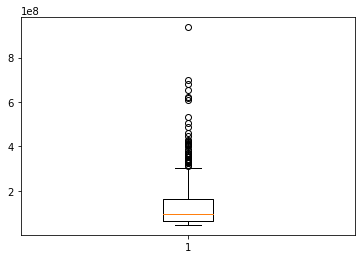

In [20]:
# a boxplot of our domestic gross column

plt.boxplot(df_filtered['domestic_gross'])
plt.show()

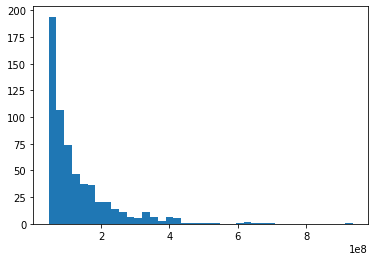

In [21]:
# a histogram of our domestic gross column

plt.hist(df_filtered['domestic_gross'], bins='auto')
plt.show()

In [22]:
df_filtered['domestic_gross'].median()

93526665.5

This is a non-normal distribution that is highly skewed. 

<AxesSubplot:xlabel='seasons'>

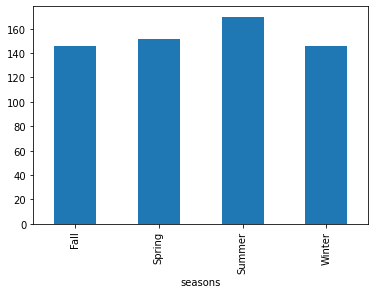

In [23]:
# plotting count of movies by season
   
df_filtered.groupby('seasons')['movie'].count().plot(kind='bar')

<AxesSubplot:xlabel='seasons'>

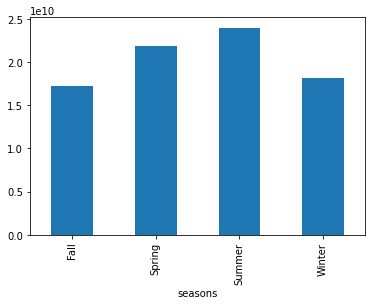

In [24]:
# plotting sum of gross revenue generated from movies by season

df_filtered.groupby('seasons')['domestic_gross'].sum().plot(kind='bar')

In [25]:
df_means = df_filtered.groupby('seasons')['domestic_gross'].mean().reset_index()
df_means

,seasons,domestic_gross
0,Fall,1.178734e+08
1,Spring,1.434735e+08
2,Summer,1.410806e+08
3,Winter,1.244989e+08


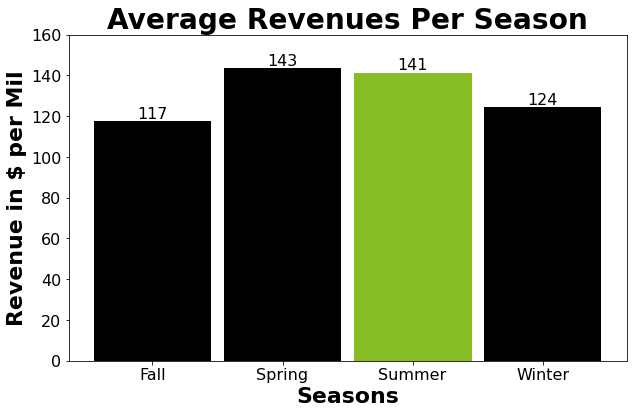

In [26]:
# plotting average of gross revenue generated from movies by season
seasons = df_means['seasons']
rev_per_mil = df_means['domestic_gross']/1000000

# sns.set_style('dark')

plt.figure(figsize=(10,6))

barlist = plt.bar(seasons, rev_per_mil, width=0.9, color = 'black')
barlist[2].set_color('#86BC24')
plt.title('Average Revenues Per Season', fontsize=28, fontweight='bold')
plt.xlabel("Seasons", fontsize=22, fontweight='bold')
plt.ylabel("Revenue in $ per Mil", fontsize=22, fontweight='bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(top=160)


for index, value in enumerate(rev_per_mil.astype(int)):
    plt.text(index,value+2, str(value), fontsize=16, horizontalalignment='center')

plt.show()    


Our plot seems to somewhat agree with our hypothesis. If we wanted to further test our hypothesis, we could perform a chi-squared test, as shown below. 


In [27]:
summer_df = df_filtered[df_filtered['seasons']=='Summer']
print(f"mean: {summer_df['domestic_gross'].mean().astype(int)}; number of movies: {len(summer_df)}")

mean: 141080559; number of movies: 170


In [28]:
summer_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons
10,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,Summer
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,Summer
28,29,2013-06-14,Man of Steel,225000000,291045518,667999518,Summer
30,31,2012-07-03,The Amazing Spider-Man,220000000,262030663,757890267,Summer
32,33,2017-06-21,Transformers: The Last Knight,217000000,130168683,602893340,Summer


In [29]:
import scipy.stats as stats
from math import sqrt
import numpy as np
from numbers import Number

# Population mean
mu_0 = df_filtered['domestic_gross'].mean()

# Population standard deviation
sigma = df_filtered['domestic_gross'].std()

# Mean gross revenue of summer sample
x_bar = summer_df['domestic_gross'].mean()

# std gross revenue of summer sample
x_std = summer_df['domestic_gross'].std()

# Number of movies in the whole population
n = len(df_filtered)

# Number of movies in the sample
n_sample = len(summer_df)

# Alpha (1 - confidence level)
alpha = 0.05

### Further analysis based on months and comparing gross revenue to net revenue
We wanted to drill down on our data and break revenue down by the month to see what month would be the most optimal to release a movie.  

In [30]:
df_filtered['month_name'] = df_filtered['release_date'].dt.strftime('%b')
df_filtered['month'] = df_filtered['release_date'].dt.month

df_filtered

<ipython-input-30-b0d64b85b55c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month_name'] = df_filtered['release_date'].dt.strftime('%b')
<ipython-input-30-b0d64b85b55c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['release_date'].dt.month


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons,month_name,month
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,May,5
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,May,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,Dec,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,Dec,12
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,Apr,4
...,...,...,...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581,Summer,Jun,6
4668,69,2012-10-12,Sinister,3000000,48086903,87727807,Fall,Oct,10
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,Spring,Apr,4
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,Spring,Mar,3


In [31]:
df_filtered['net_revenue'] = df_filtered['worldwide_gross'].astype(int) - df_filtered['production_budget']
df_filtered

<ipython-input-31-7f45004f86ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['net_revenue'] = df_filtered['worldwide_gross'].astype(int) - df_filtered['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,seasons,month_name,month,net_revenue
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Spring,May,5,635063875
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Spring,May,5,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Winter,Dec,12,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,Winter,Dec,12,1747311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Spring,Apr,4,1748134200
...,...,...,...,...,...,...,...,...,...,...
4666,67,2013-06-07,The Purge,3000000,64473115,91266581,Summer,Jun,6,88266581
4668,69,2012-10-12,Sinister,3000000,48086903,87727807,Fall,Oct,10,84727807
5062,63,2011-04-01,Insidious,1500000,54009150,99870886,Spring,Apr,4,98370886
5189,90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,Spring,Mar,3,62627092


<AxesSubplot:xlabel='month'>

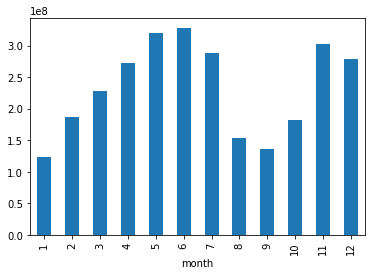

In [32]:
df_filtered.groupby('month')['net_revenue'].mean().plot(kind='bar')

In [33]:
# you need to type this in
month = ['Jan', 'Feb', 'Mar', 'Apr',
          'May', 'Jun', 'Jul', 'Aug',
          'Sep', 'Oct', 'Nov', 'Dec']

# (df.groupby(df['date'].dt.strftime('%B'))
#    ['total'].sum()
#    .reindex(months)
#    .plot.bar(figsize=(20,10))
# )


month_means = df_filtered.groupby('month')['domestic_gross'].mean().reset_index()

months = month_means['month']
rev_per_mth = month_means['domestic_gross']/1000000
months

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month, dtype: int64

In [34]:
df_filtered.groupby('month')['domestic_gross'].mean().reset_index()['domestic_gross']/1000000

0      76.323934
1     111.703293
2     134.172853
3     125.123016
4     164.320226
5     168.239166
6     139.881768
7     102.197922
8      83.710255
9      98.098265
10    149.565381
11    154.264547
Name: domestic_gross, dtype: float64

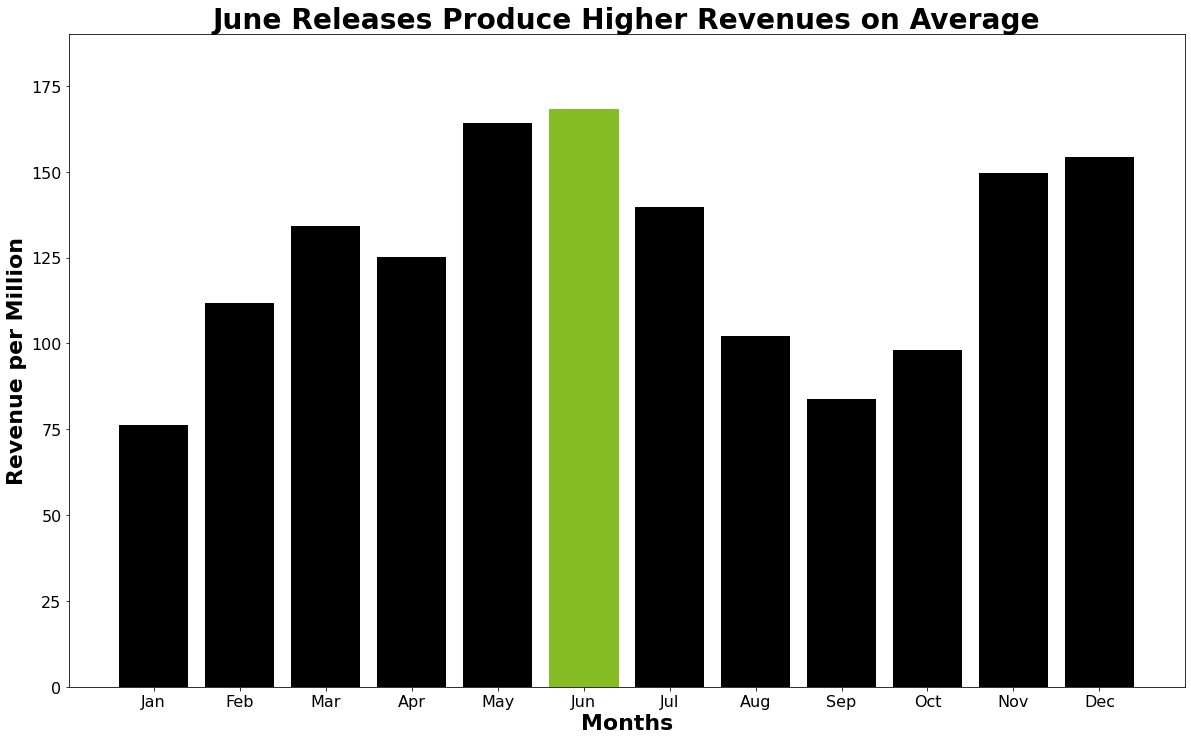

In [35]:
plt.figure(figsize=(20,12))

barlist = plt.bar(months, rev_per_mth, color = 'black')
barlist[5].set_color('#86BC24')
plt.title('June Releases Produce Higher Revenues on Average', fontsize=28, fontweight='bold')
plt.xlabel("Months", fontsize=22, fontweight='bold')
plt.ylabel("Revenue per Million", fontsize=22, fontweight='bold')
plt.xticks(ticks=months,labels=month,fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(top=190)


# for index, value in enumerate(rev_per_mth.astype(int)):
#     plt.text(index,value, str(value), fontsize=16)

plt.show()    